**Music genre Classification **


## **Mini Project **

In [1]:
# Import the python library
# Using librosa to extract the features
import librosa
import pandas as pd
import csv
import os
import numpy as np

 Pandas- used for read the data frame from csv.file
 Librosa-to do audio analysis
 Numpy- used for array to do mathematical calculation in the form of linear algebra.It is faster from list.
 list and tuple are data structure tuple is immutable list is mutable. 
 matplotlib- is an amazing visulazing libtrary in python for 2D plots of array.eg- histogram,line chart.

In [2]:
data = pd.read_csv('data.csv')
data = data.drop(['filename'],axis=1)

# Manualy drop the mfccs from 13 to 20 for training the model
data = data.drop(['zero_crossing_rate'],axis=1)
data = data.drop(['mfcc13'],axis=1)
data = data.drop(['mfcc14'],axis=1)
data = data.drop(['mfcc15'],axis=1)
data = data.drop(['mfcc16'],axis=1)
data = data.drop(['mfcc17'],axis=1)
data = data.drop(['mfcc18'],axis=1)
data = data.drop(['mfcc19'],axis=1)
data = data.drop(['mfcc20'],axis=1)

data.shape

(1000, 22)

In this we first read rthe data set. 
DRop- it is used to remove row and col by specifiying labels name and corresponding axis. 
Shape-it will always return tuple. list small bracket tuple big bracket.
data.shape return array size (1000 row, 22 col).

# **Methods for applying algorithms**

Logistic Regression and SVC (Support Vector Classification)**bold text**

In [3]:
from sklearn import linear_model
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.model_selection import GridSearchCV
import lightgbm as lgbm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt 
import joblib
import seaborn as sn

genre_list = ["Blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

#Function to train the model using Logistic Regression
def log_reg_func(X_train, y_train, X_test, y_test, genre):
	logistic_classifier = linear_model.LogisticRegression(max_iter=1000)
	logistic_classifier.fit(X_train, y_train)
 
	logistic_predictions = logistic_classifier.predict(X_test)
	logistic_accuracy = accuracy_score(y_test, logistic_predictions)
 
	logistic_cm = confusion_matrix(y_test, logistic_predictions)
 
	print("Train set accuracy: {:.2f}".format(logistic_classifier.score(X_train, y_train)))
	print("Test set accuracy = " + str(logistic_accuracy))
	joblib.dump(logistic_classifier, 'model.pkl')
	plot_matrix(logistic_cm, "Confusion matrix of Logistic Regression", genre)
 
 #Function to plot the confusion matrix
def plot_matrix(cm, title, genre):
  df_cm = pd.DataFrame(cm, index = ["Blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
                  columns = ["Blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
  plt.figure(figsize = (10,7)),	plt.title(title)
  sn.heatmap(df_cm, annot=True, cmap="YlGnBu")
	

sklearn- statical modelling in which classification,regression comes under this.
pipeline-  The purpose of the pipeline is to assemble several steps that can be cross-validated together.
seaborn- used for 3D graphical representation. heat map .
joblib- used to inc the speed of pipeline.there are various reason to integrate joblib but 2 are imp.
capability - to avoid re computation
execute parallelization- to fully utlize all the cores.
lightgbm- light gradient boosting machine.tree based prediction a type of framework.if data has more feature then its efficiency is not up to the level.in this every data is scan and estimate it by splliting point which is  very time consuming.

In [4]:
linear_params = {
    "cls__C": [0.5, 1, 2, 5],  
    "cls__kernel": ['linear'],
}

poly_params = {
    "cls__C": [0.5, 1, 2, 5],
    "cls__kernel": ['poly'],
}

rbf_params = {
    "cls__C": [0.5, 1, 2, 5],
    "cls__kernel": ['rbf'],
}

pipe_svm = Pipeline([
    ('scale', StandardScaler()),
    ('var_tresh', VarianceThreshold(threshold=(.8 * (1 - .8)))),
    ('feature_selection', SelectFromModel(lgbm.LGBMClassifier())),
    ('cls', svm.SVC())
])

#Function to train the model using SVM
def svm_model(params, X_train, y_train, X_test, y_test, title):
  svm = GridSearchCV(pipe_svm, params, scoring='accuracy', cv=5)
  svm.fit(X_train, y_train)
  svm_pred = svm.predict(X_test)

  train_accuracy = svm.score(X_train, y_train)
  test_accuracy = svm.score(X_test, y_test)
  print("Train set accuracy: {:.2f}".format(train_accuracy))
  print("Test set accuracy: {:.2f}".format(test_accuracy))

  svm_cm = confusion_matrix(y_test, svm_pred)

  plot_matrix(svm_cm, title, genre_list)

kernel parameters selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane.

# **Training the datatset**

In [5]:
# Scaling the dataset
# and Label encoding the label (genres)
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [6]:
# Split the dataset with 70% for training set and 30% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#Training Model using KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print("Train set accuracy: {:.2f}".format(train_accuracy))
print("Test set accuracy: {:.2f}".format(test_accuracy))

Train set accuracy: 0.82
Test set accuracy: 0.60


## Support Vector Classifier (SVC)

Train set accuracy: 0.70
Test set accuracy: 0.56


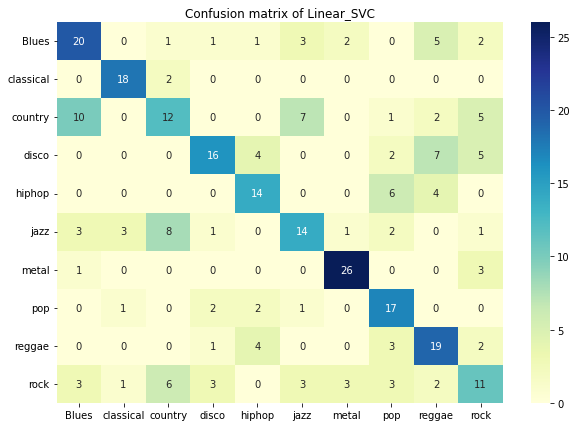

In [8]:
svm_model(linear_params, X_train, y_train, X_test, y_test, "Confusion matrix of Linear_SVC")

Train set accuracy: 0.83
Test set accuracy: 0.60


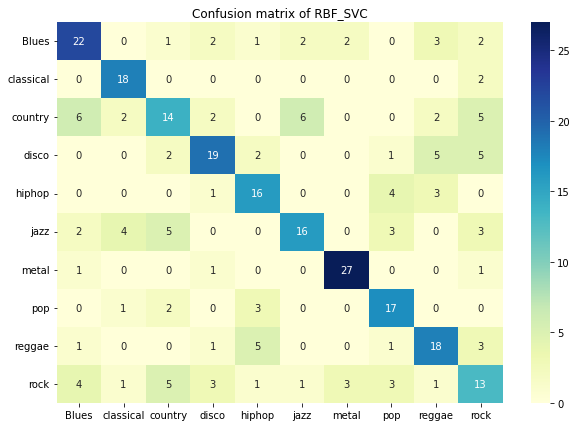

In [9]:
svm_model(rbf_params, X_train, y_train, X_test, y_test, "Confusion matrix of RBF_SVC")

Train set accuracy: 0.79
Test set accuracy: 0.59


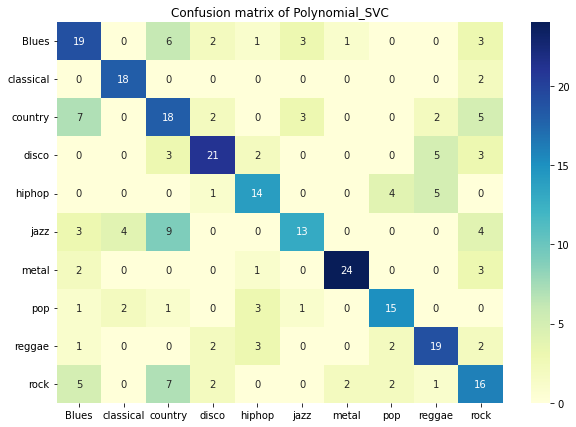

In [10]:
svm_model(poly_params, X_train, y_train, X_test, y_test, "Confusion matrix of Polynomial_SVC")

## Logistic Regression

Train set accuracy: 0.76
Test set accuracy = 0.63


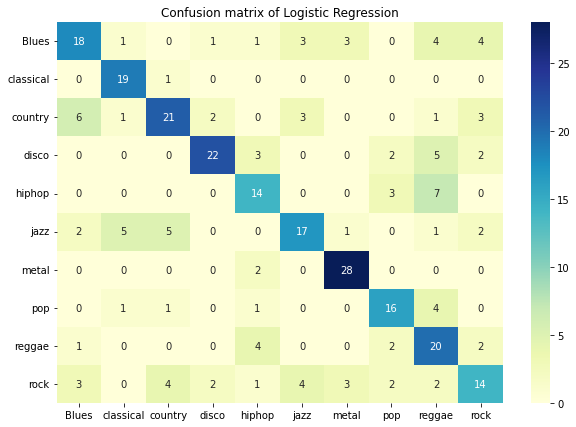

In [11]:
log_reg_func(X_train, y_train, X_test, y_test, genre_list)

# **Training the Chromagram and MFCCs features**

## Chromagram

c:\Users\mona0\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train set accuracy: 0.27
Test set accuracy = 0.19666666666666666


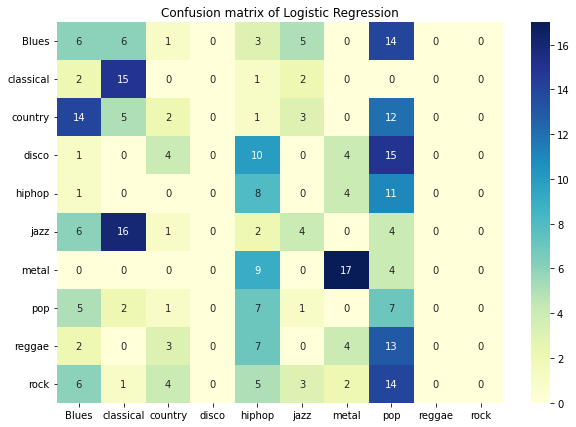

In [12]:
#traing the model using only Chroma as feature

chroma = scaler.fit_transform(np.array(data.iloc[:,0]).reshape(-1,1))
chromaX_train, chromaX_test, chromaY_train, chromaY_test = train_test_split(chroma, y.reshape(-1,1), test_size=0.30, random_state=42)
log_reg_func(chromaX_train, chromaY_train, chromaX_test, chromaY_test, ["Blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])

Train set accuracy: 0.27
Test set accuracy: 0.19


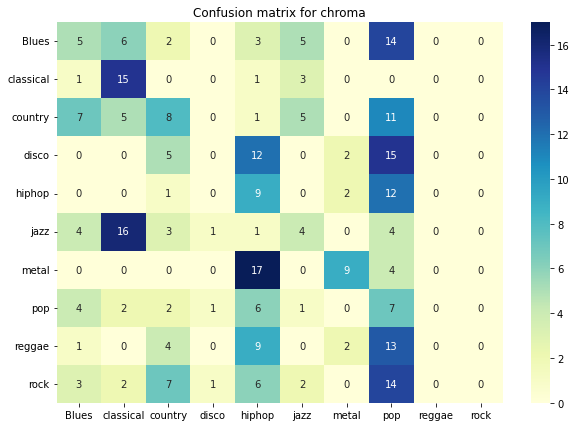

In [13]:
# train the model with SVM using Linear kernal
svm_model(linear_params, chromaX_train, chromaY_train.ravel(), chromaX_test, chromaY_test, "Confusion matrix for chroma")

Train set accuracy: 0.30
Test set accuracy: 0.25


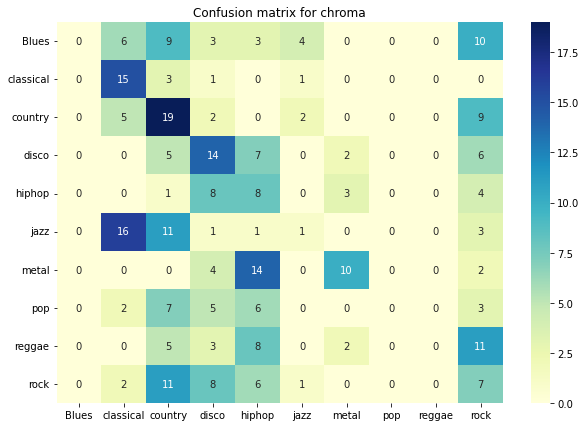

In [14]:
# train the model with SVM using RBF kernal
svm_model(rbf_params, chromaX_train, chromaY_train.ravel(), chromaX_test, chromaY_test, "Confusion matrix for chroma")

Train set accuracy: 0.25
Test set accuracy: 0.18


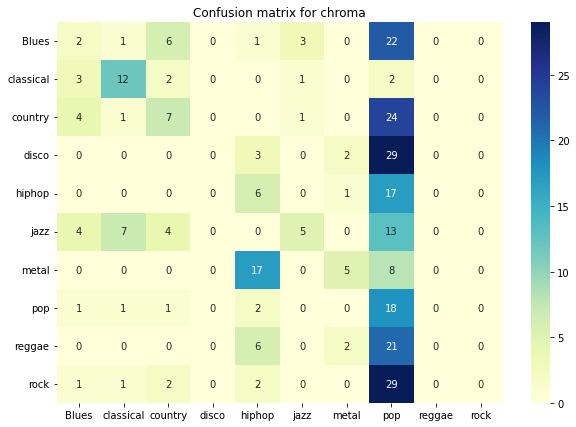

In [15]:
# train the model with SVM using Polynomial kernal
svm_model(poly_params, chromaX_train, chromaY_train.ravel(), chromaX_test, chromaY_test, "Confusion matrix for chroma")

In [16]:
# train the model with KNN
model_chroma = KNeighborsClassifier(n_neighbors=3)
model_chroma.fit(chromaX_train, chromaY_train)
model_chroma_pred = model_chroma.predict(chromaX_test)

train_accuracy = model_chroma.score(chromaX_train, chromaY_train)
test_accuracy = accuracy_score(chromaY_test, model_chroma_pred)
print("Train set accuracy: {:.2f}".format(train_accuracy))
print("Test set accuracy: {:.2f}".format(test_accuracy))

Train set accuracy: 0.53
Test set accuracy: 0.23


c:\Users\mona0\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


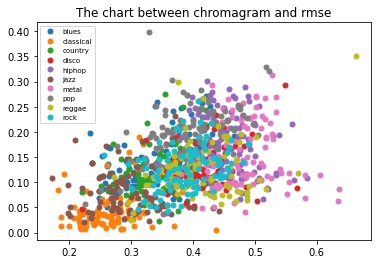

In [17]:
groups = data.groupby('label')

# Plot the chromagram
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.chroma_stft, group.rmse, marker='o', linestyle='', ms=5, label=name)
ax.legend(prop=dict(size=7))
plt.title("The chart between chromagram and rmse")

plt.show()

## MFCCS

c:\Users\mona0\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train set accuracy: 0.59
Test set accuracy = 0.47333333333333333


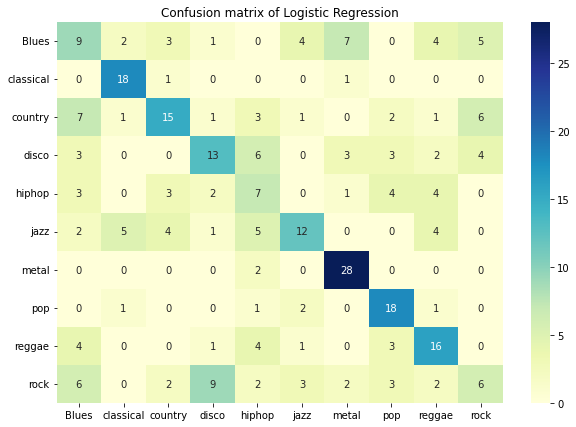

In [18]:
#traing the model using only Chroma as feature
mfccs = scaler.fit_transform(np.array(data.iloc[:,9:-1]))
mfccsX_train, mfccsX_test, mfccsY_train, mfccsY_test = train_test_split(mfccs, y.reshape(-1,1), test_size=0.30, random_state=42)
log_reg_func(mfccsX_train, mfccsY_train, mfccsX_test, mfccsY_test, ["Blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])

Train set accuracy: 0.50
Test set accuracy: 0.41


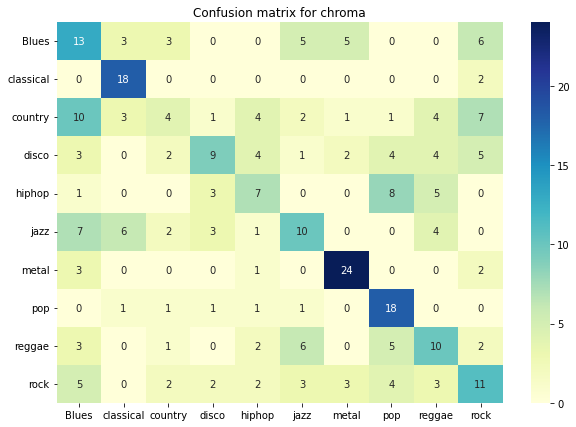

In [19]:
# train the model with SVM using Linear kernal
svm_model(linear_params, mfccsX_train, mfccsY_train.ravel(), mfccsX_test, mfccsY_test, "Confusion matrix for chroma")

Train set accuracy: 0.62
Test set accuracy: 0.47


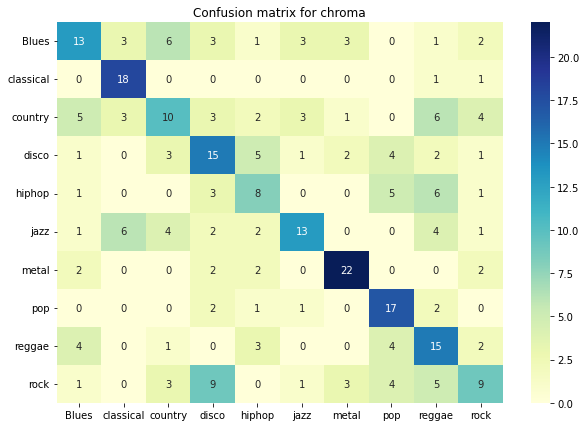

In [20]:
# train the model with SVM using RBF kernal
svm_model(rbf_params, mfccsX_train, mfccsY_train.ravel(), mfccsX_test, mfccsY_test, "Confusion matrix for chroma")

Train set accuracy: 0.64
Test set accuracy: 0.46


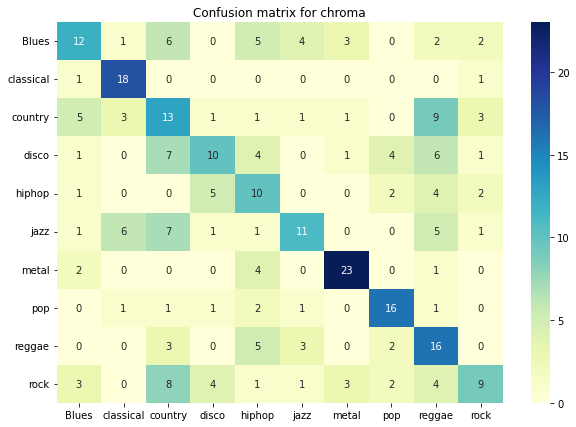

In [21]:
# train the model with SVM using Polynomial kernal
svm_model(poly_params, mfccsX_train, mfccsY_train.ravel(), mfccsX_test, mfccsY_test, "Confusion matrix for chroma")

In [22]:
# train the model with KNN
model_mfccs = KNeighborsClassifier(n_neighbors=3)
model_mfccs.fit(mfccsX_train, mfccsY_train)
model_mfccs_pred = model_mfccs.predict(mfccsX_test)

train_accuracy = model_mfccs.score(mfccsX_train, mfccsY_train)
test_accuracy = accuracy_score(mfccsY_test, model_mfccs_pred)
print("Train set accuracy: {:.2f}".format(train_accuracy))
print("Test set accuracy: {:.2f}".format(test_accuracy))

Train set accuracy: 0.77
Test set accuracy: 0.53


c:\Users\mona0\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


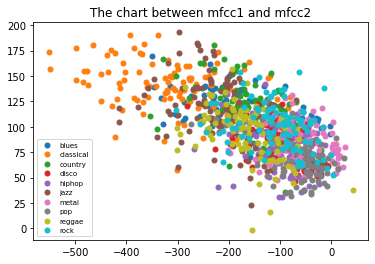

In [23]:
groups = data.groupby('label')

# Plot the chromagram
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.mfcc1, group.mfcc2, marker='o', linestyle='', ms=5, label=name)
ax.legend(prop=dict(size=7))
plt.title("The chart between mfcc1 and mfcc2")
plt.show()